### Importing Necessary Libraries ###

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Matplotlib is building the font cache; this may take a moment.


loading the data

In [3]:
data_path = r"C:\Users\Dell\Pictures\Solar-challenge-week0\Solar-challenge-week0\data\benin-malanville.csv"
df = pd.read_csv(data_path)

### Display the First Few Rows of the Dataset

In [4]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


### Display the Shape of the Dataset

In [5]:
print(df.shape)

(525600, 19)


### Summary statistics for all numeric columns

In [6]:
print(" Summary Statistics:")
display(df.describe())

 Summary Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


### Missing value count per column

In [7]:
print("\n Missing Values Count:")
missing_values = df.isna().sum()
display(missing_values)



 Missing Values Count:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [8]:
#  Calculate percentage of missing values per column
missing_percent = (df.isna().sum() / len(df)) * 100

In [9]:
# Filter columns with more than 5% missing values
print("\n Columns with >5% Missing Values:")
columns_with_missing = missing_percent[missing_percent > 5]
display(columns_with_missing)



 Columns with >5% Missing Values:


Comments    100.0
dtype: float64

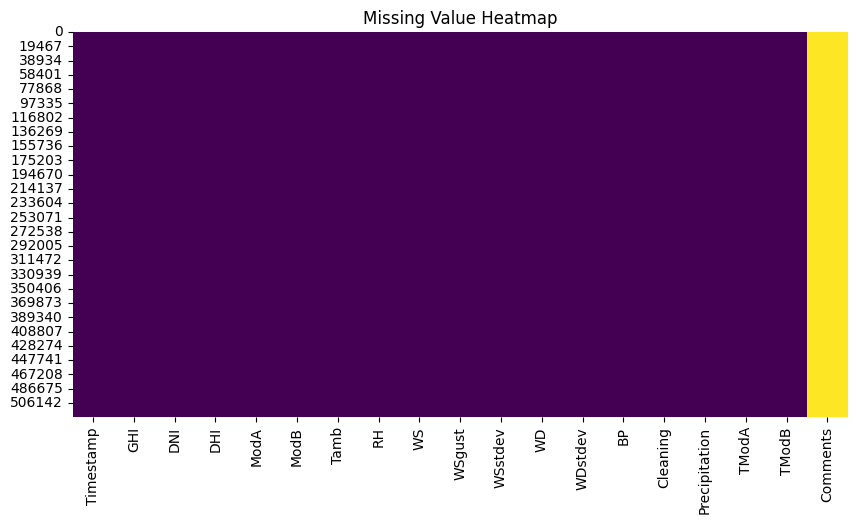

In [10]:
# visualize missingness
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

In [11]:
# Define important numeric columns to inspect
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

#  Check for missing values in these columns
print(" Missing Value Summary:")
missing_report = df[key_columns].isna().sum().sort_values(ascending=False)
display(missing_report)

#  Percentage of missing values
missing_percent = (df[key_columns].isna().sum() / len(df)) * 100
print("\n  Percentage of Missing Values:")
display(missing_percent)

 Missing Value Summary:


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


  Percentage of Missing Values:


GHI       0.0
DNI       0.0
DHI       0.0
ModA      0.0
ModB      0.0
WS        0.0
WSgust    0.0
dtype: float64

### Detecting and Visualizing Outliers Using the IQR (Interquartile Range) Method


 Outlier Detection (IQR Method):
GHI: 145 outliers (0.03% of data)
DNI: 15196 outliers (2.89% of data)
DHI: 8733 outliers (1.66% of data)
ModA: 98 outliers (0.02% of data)
ModB: 240 outliers (0.05% of data)
WS: 6717 outliers (1.28% of data)
WSgust: 5368 outliers (1.02% of data)


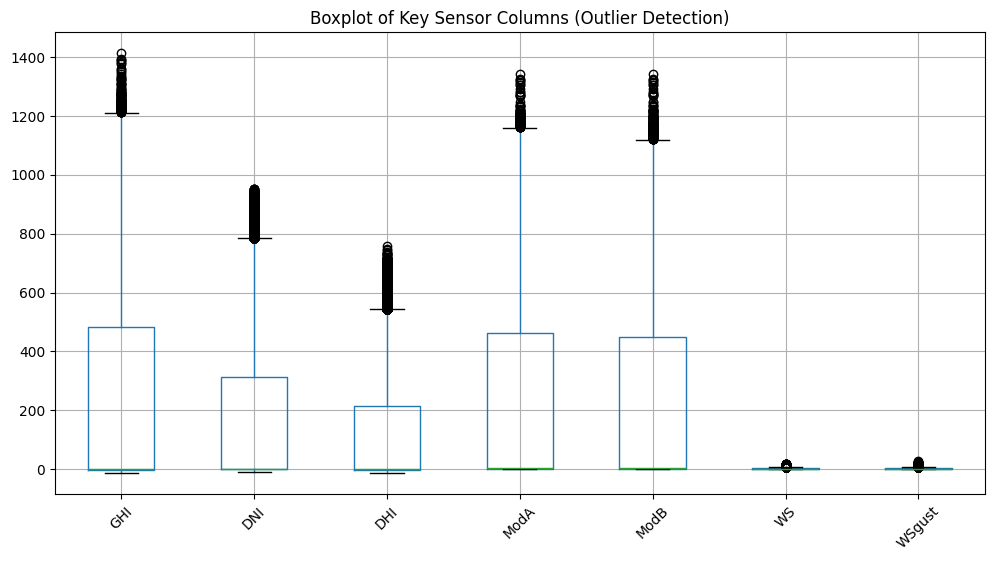

In [12]:
# Detect outliers using the IQR (Interquartile Range) method
print("\n Outlier Detection (IQR Method):")
outlier_summary = {}

for col in key_columns:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = len(outliers)
        print(f"{col}: {len(outliers)} outliers ({(len(outliers)/len(df))*100:.2f}% of data)")

#  Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
df[key_columns].boxplot()
plt.title("Boxplot of Key Sensor Columns (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

### Z-Score Outlier Detection

 Total rows flagged as potential outliers (|Z| > 3): 7740 (1.47% of data)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
670,2021-08-09 11:11,836.0,235.0,610.6,778.8,783.8,30.3,68.2,3.2,4.1,0.7,190.5,18.4,999,0,0.0,63.0,52.7,NaN
671,2021-08-09 11:12,1274.0,698.8,615.2,1210.3,1210.3,30.1,69.6,3.4,4.1,0.6,175.8,13.3,999,0,0.0,63.7,53.1,NaN
672,2021-08-09 11:13,938.0,340.1,612.8,891.1,891.1,30.4,68.4,3.4,4.6,0.9,171.5,11.9,999,0,0.0,65.8,54.3,NaN
673,2021-08-09 11:14,718.5,126.8,593.2,682.6,682.6,30.6,68.2,4.7,5.6,0.6,160.7,8.0,999,0,0.0,65.4,54.2,NaN
674,2021-08-09 11:15,1349.0,771.8,618.0,1281.5,1281.5,30.9,67.1,4.0,4.6,0.4,169.1,12.3,999,0,0.0,65.0,53.5,NaN


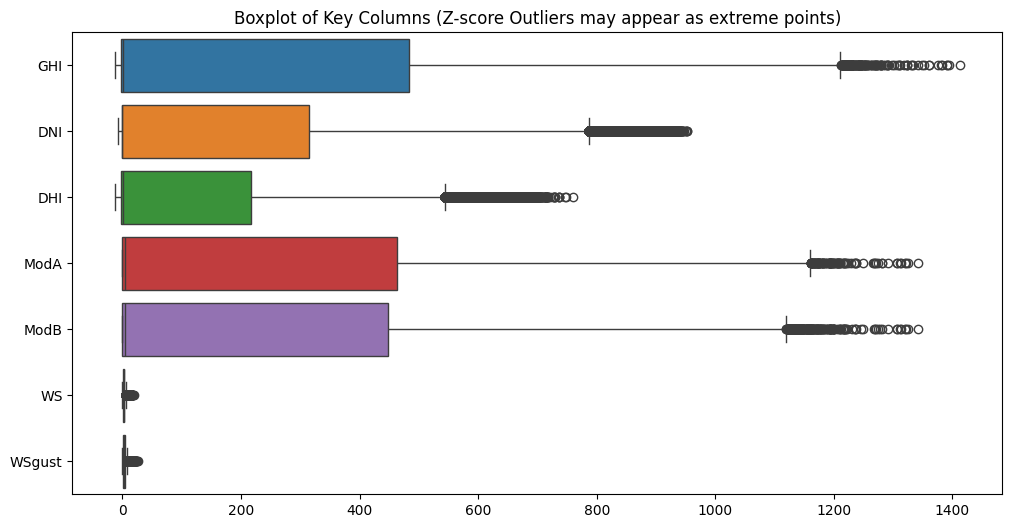

In [13]:
# --- Z-Score Outlier Detection ---

# Define key columns
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores for each key column
z_scores = np.abs(stats.zscore(df[key_columns], nan_policy='omit'))  # ignore NaNs

# Convert to DataFrame for easier handling
z_df = pd.DataFrame(z_scores, columns=key_columns)

# Flag rows where any column has |Z| > 3
outlier_mask = (z_df > 3).any(axis=1)
outliers_zscore = df[outlier_mask]

# Print summary
print(f" Total rows flagged as potential outliers (|Z| > 3): {outlier_mask.sum()} ({(outlier_mask.sum()/len(df))*100:.2f}% of data)")

# Optional: show first few flagged rows
display(outliers_zscore.head())

# (Optional) visualize distributions with potential outliers highlighted
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[key_columns], orient="h")
plt.title("Boxplot of Key Columns (Z-score Outliers may appear as extreme points)")
plt.show()


### Missing Values in Key Columns ---


In [14]:
# Define the key columns to clean
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Check missing values before cleaning
print("🔍 Missing values before cleaning:")
display(df[key_columns].isna().sum())

# Option A: Drop rows where any key column is missing
df_drop = df.dropna(subset=key_columns)
print(f"\n🗑️ Dropped rows with missing key values: {len(df) - len(df_drop)}")

# Option B: Impute missing values with median (recommended for sensor data)
df_impute = df.copy()
for col in key_columns:
    median_value = df_impute[col].median()
    df_impute[col].fillna(median_value, inplace=True)
    print(f"✅ Imputed missing values in '{col}' with median = {median_value:.2f}")

# Verify no missing values remain
print("\n📉 Missing values after imputation:")
display(df_impute[key_columns].isna().sum())


🔍 Missing values before cleaning:


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


🗑️ Dropped rows with missing key values: 0
✅ Imputed missing values in 'GHI' with median = 1.80
✅ Imputed missing values in 'DNI' with median = -0.10
✅ Imputed missing values in 'DHI' with median = 1.60
✅ Imputed missing values in 'ModA' with median = 4.50
✅ Imputed missing values in 'ModB' with median = 4.30
✅ Imputed missing values in 'WS' with median = 1.90
✅ Imputed missing values in 'WSgust' with median = 2.60

📉 Missing values after imputation:


C:\Users\Dell\AppData\Local\Temp\ipykernel_17348\753097521.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_impute[col].fillna(median_value, inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17348\753097521.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

### Export Cleaned Dataset 

In [15]:
# --- Export Cleaned Dataset ---

# Define output path
output_path = r"C:\Users\Dell\Pictures\Solar-challenge-week0\Solar-challenge-week0\data\benin-clean.csv"

# Export the cleaned DataFrame (after imputation or dropping missing values)
df_impute.to_csv(output_path, index=False)

print(f" Cleaned dataset successfully saved to: {output_path}")


 Cleaned dataset successfully saved to: C:\Users\Dell\Pictures\Solar-challenge-week0\Solar-challenge-week0\data\benin-clean.csv


### Time-Based Data Visualization

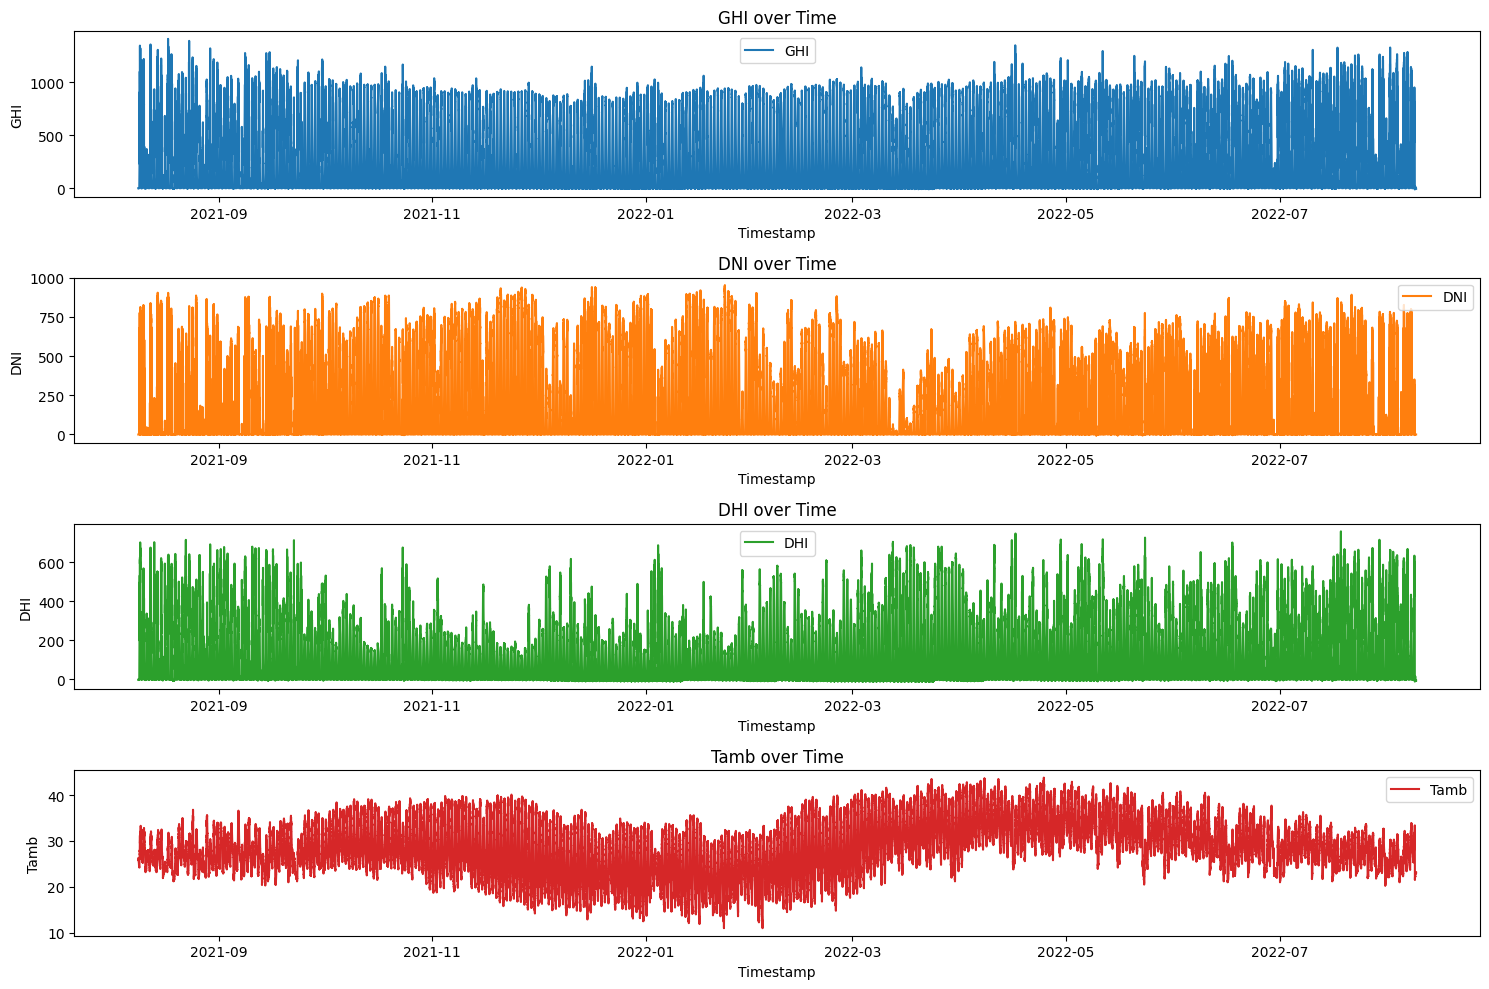

C:\Users\Dell\AppData\Local\Temp\ipykernel_17348\2452975491.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ghi_hourly.index, y=ghi_hourly.values, palette="viridis")


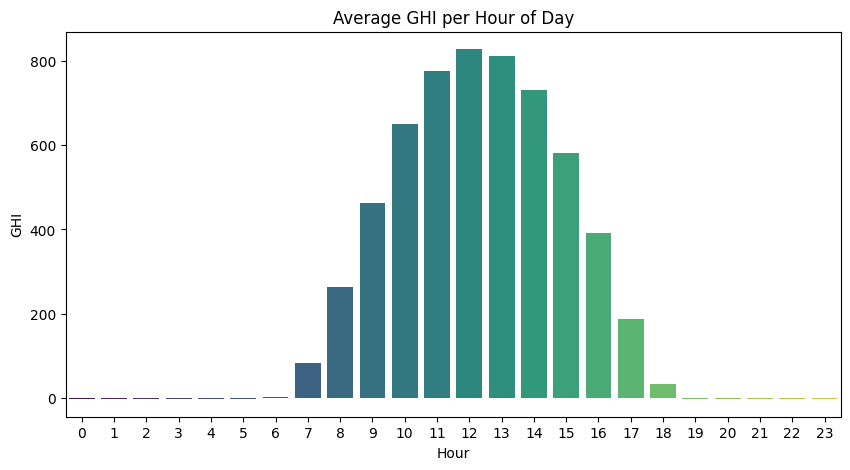

In [16]:
# --- Ensure Timestamp is datetime ---
df_impute['Timestamp'] = pd.to_datetime(df_impute['Timestamp'])

# --- Set Timestamp as index for plotting (optional for line plots) ---
df_plot = df_impute.set_index('Timestamp')

# --- Line plots for each variable ---
variables = ['GHI', 'DNI', 'DHI', 'Tamb']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    plt.plot(df_plot.index, df_plot[var], label=var, color=sns.color_palette("tab10")[i-1])
    plt.title(f'{var} over Time')
    plt.xlabel('Timestamp')
    plt.ylabel(var)
    plt.legend()
    plt.tight_layout()

plt.show()

# Bar plot (aggregate by hour/day if many timestamps) ---
# Example: average GHI per hour
df_plot['Hour'] = df_plot.index.hour
ghi_hourly = df_plot.groupby('Hour')['GHI'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=ghi_hourly.index, y=ghi_hourly.values, palette="viridis")
plt.title("Average GHI per Hour of Day")
plt.xlabel("Hour")
plt.ylabel("GHI")
plt.show()


### Time-Based Feature Extraction and Anomaly Detection

C:\Users\Dell\AppData\Local\Temp\ipykernel_17348\2092992827.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")
C:\Users\Dell\AppData\Local\Temp\ipykernel_17348\2092992827.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")
C:\Users\Dell\AppData\Local\Temp\ipykernel_17348\2092992827.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")
C:\Users\Dell\AppDa

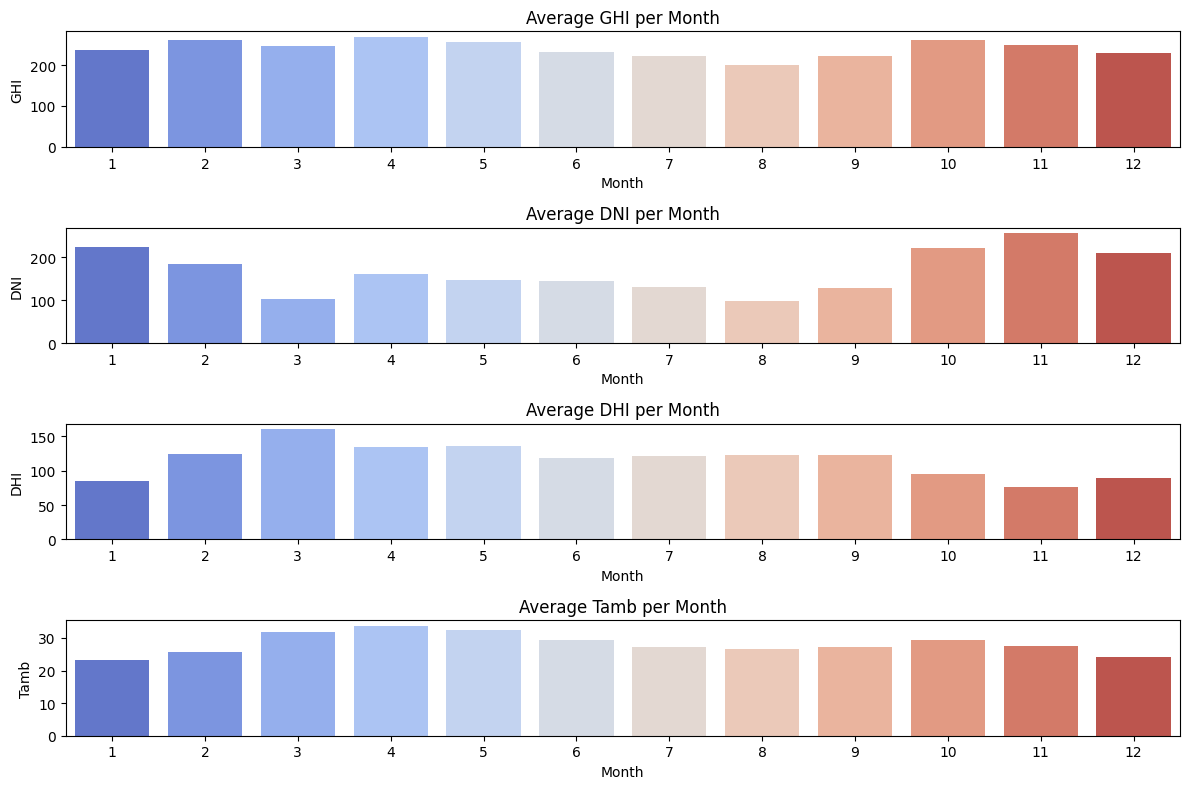

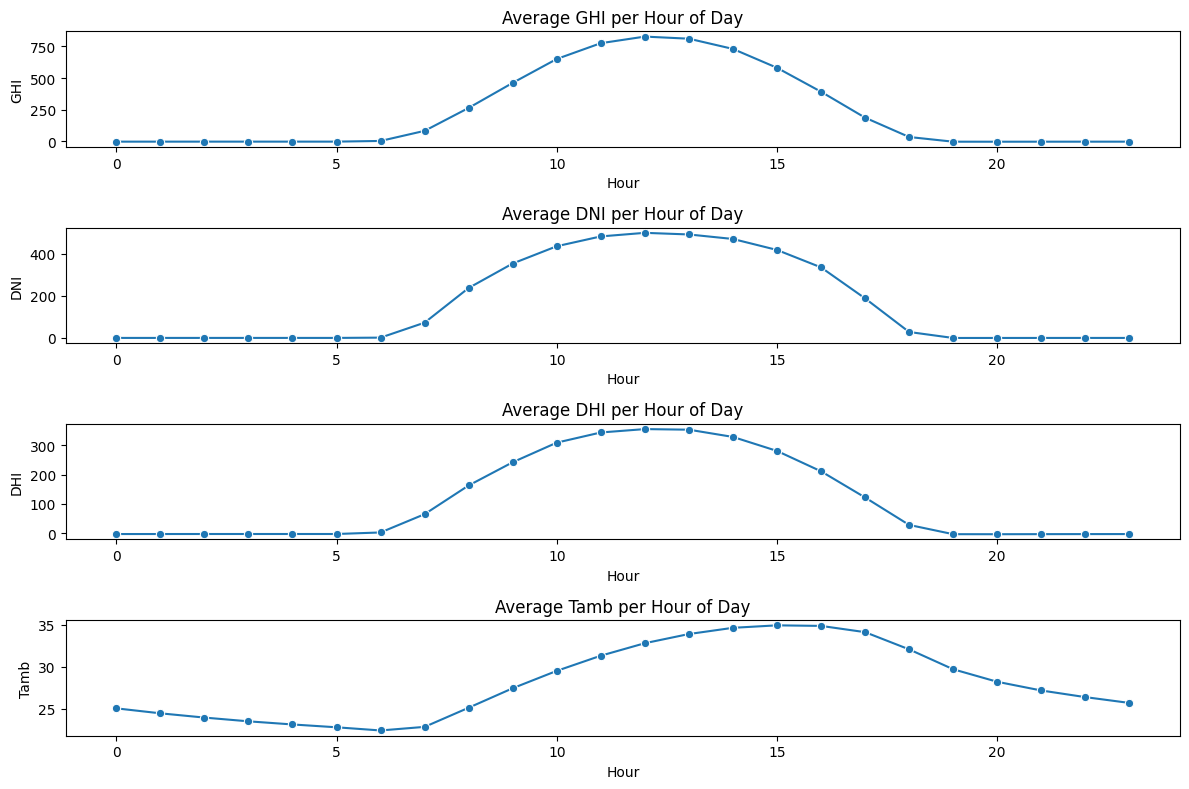

 GHI anomalies (>1233.95): 89 rows
 DNI anomalies (>952.32): 0 rows
 DHI anomalies (>591.43): 3738 rows
 Tamb anomalies (>45.95): 0 rows


In [17]:
# Convert Timestamp to datetime (if not already done)
df_impute['Timestamp'] = pd.to_datetime(df_impute['Timestamp'])

# Set Timestamp as index for easy resampling
df_ts = df_impute.set_index('Timestamp')

# Extract time-based features
df_ts['Month'] = df_ts.index.month
df_ts['Hour'] = df_ts.index.hour
df_ts['DayOfWeek'] = df_ts.index.dayofweek  # 0 = Monday, 6 = Sunday


variables = ['GHI', 'DNI', 'DHI', 'Tamb']

plt.figure(figsize=(12, 8))
for i, var in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    monthly_avg = df_ts.groupby('Month')[var].mean()
    sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")
    plt.title(f"Average {var} per Month")
    plt.xlabel("Month")
    plt.ylabel(var)
    plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, var in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    hourly_avg = df_ts.groupby('Hour')[var].mean()
    sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
    plt.title(f"Average {var} per Hour of Day")
    plt.xlabel("Hour")
    plt.ylabel(var)
    plt.tight_layout()
plt.show()

# Example: flag extreme solar irradiance or temperature
thresholds = {
    'GHI': df_ts['GHI'].mean() + 3*df_ts['GHI'].std(),
    'DNI': df_ts['DNI'].mean() + 3*df_ts['DNI'].std(),
    'DHI': df_ts['DHI'].mean() + 3*df_ts['DHI'].std(),
    'Tamb': df_ts['Tamb'].mean() + 3*df_ts['Tamb'].std()
}

for var, thresh in thresholds.items():
    anomalies = df_ts[df_ts[var] > thresh]
    print(f" {var} anomalies (>{thresh:.2f}): {len(anomalies)} rows")



### Module Performance Before and After Cleaning

📊 Average ModA & ModB pre/post-clean:


,ModA,ModB
Cleaning,,
0,236.524253,228.816071
1,307.229278,301.972165


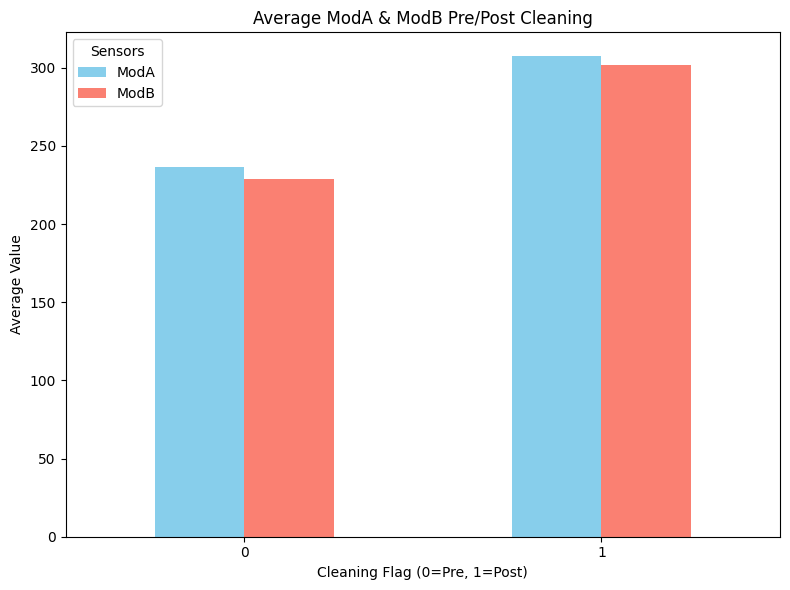

In [18]:
# Ensure Cleaning column exists
if 'Cleaning' not in df_impute.columns:
    # Example: if you haven’t created it yet, set all to 1 (cleaned)
    df_impute['Cleaning'] = 1

# Group by Cleaning flag and calculate mean of ModA & ModB
mod_avg = df_impute.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("📊 Average ModA & ModB pre/post-clean:")
display(mod_avg)

# Plotting
mod_avg.plot(kind='bar', figsize=(8,6), color=['skyblue', 'salmon'])
plt.title("Average ModA & ModB Pre/Post Cleaning")
plt.xlabel("Cleaning Flag (0=Pre, 1=Post)")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.legend(title='Sensors')
plt.tight_layout()
plt.show()


### Correlation Analysis Using Heatmap

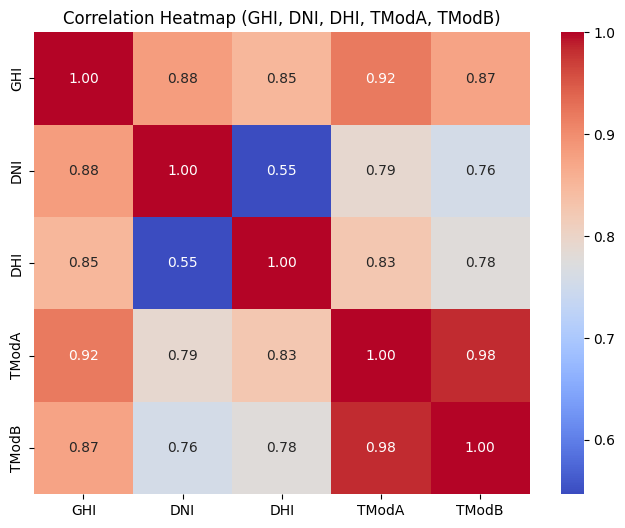

In [19]:
# Define columns for correlation heatmap
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute correlation matrix
corr_matrix = df_impute[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (GHI, DNI, DHI, TModA, TModB)")
plt.show()


### Scatter Plot Analysis: Wind Parameters vs GHI


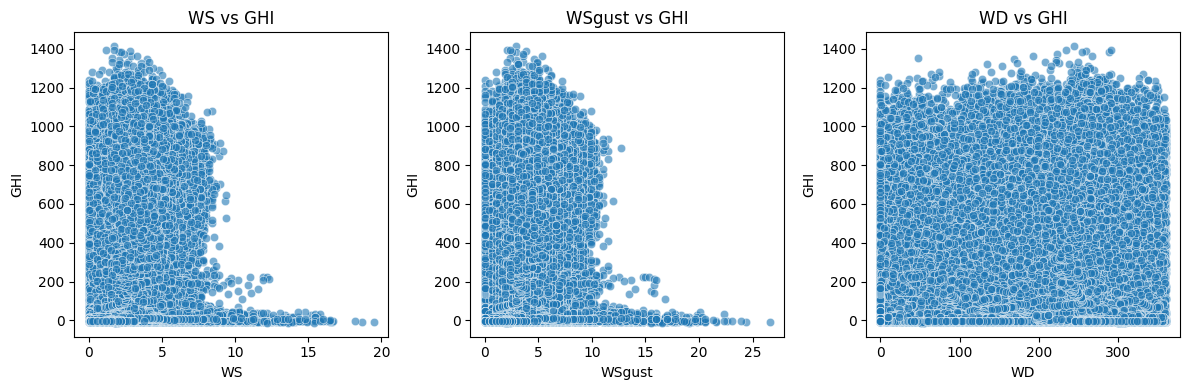

In [20]:
# Scatter plots for WS, WSgust, WD vs GHI
wind_cols = ['WS', 'WSgust', 'WD']
target = 'GHI'

plt.figure(figsize=(12, 4))
for i, col in enumerate(wind_cols, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df_impute[col], y=df_impute[target], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{col} vs {target}")
plt.tight_layout()
plt.show()


### Wind Rose Visualization

<Figure size 800x800 with 0 Axes>

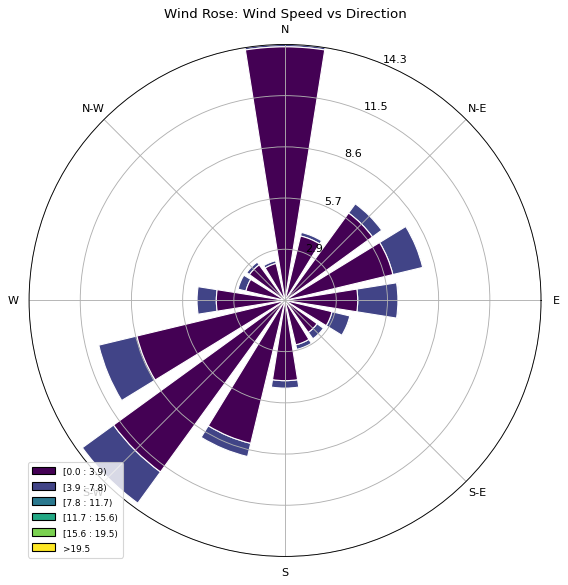

In [21]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt
from matplotlib import cm  # <- colormap object

plt.figure(figsize=(8,8))
ax = WindroseAxes.from_ax()

# Use a colormap object instead of string
ax.bar(
    df_impute['WD'],
    df_impute['WS'],
    normed=True,
    opening=0.8,
    edgecolor='white',
    bins=6,
    cmap=cm.viridis  # <- use cm.viridis instead of 'viridis'
)
ax.set_legend()
plt.title("Wind Rose: Wind Speed vs Direction")
plt.show()




### Radial Bar Plot: Average Wind Speed by Direction

C:\Users\Dell\AppData\Local\Temp\ipykernel_17348\359275143.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ws_avg = df_impute.groupby(pd.cut(df_impute['WD'], wd_bins, right=False))['WS'].mean()


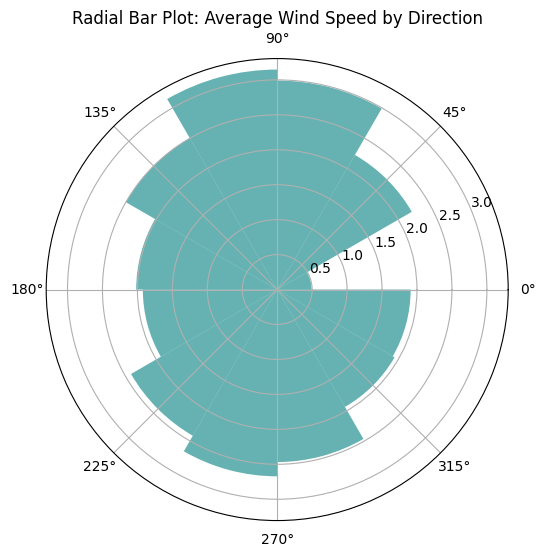

In [22]:
# Define wind direction bins (0-360 degrees, 30° bins)
wd_bins = np.arange(0, 361, 30)  # include 360
ws_avg = df_impute.groupby(pd.cut(df_impute['WD'], wd_bins, right=False))['WS'].mean()

# Compute angles for bar centers
theta = np.radians([interval.left + (interval.right-interval.left)/2 for interval in ws_avg.index])

radii = ws_avg.values  # now lengths match

# Radial bar plot
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=np.radians(30), bottom=0.0, color='teal', alpha=0.6)
plt.title("Radial Bar Plot: Average Wind Speed by Direction")
plt.show()


### Distribution Analysis of GHI and Wind Speed (WS)

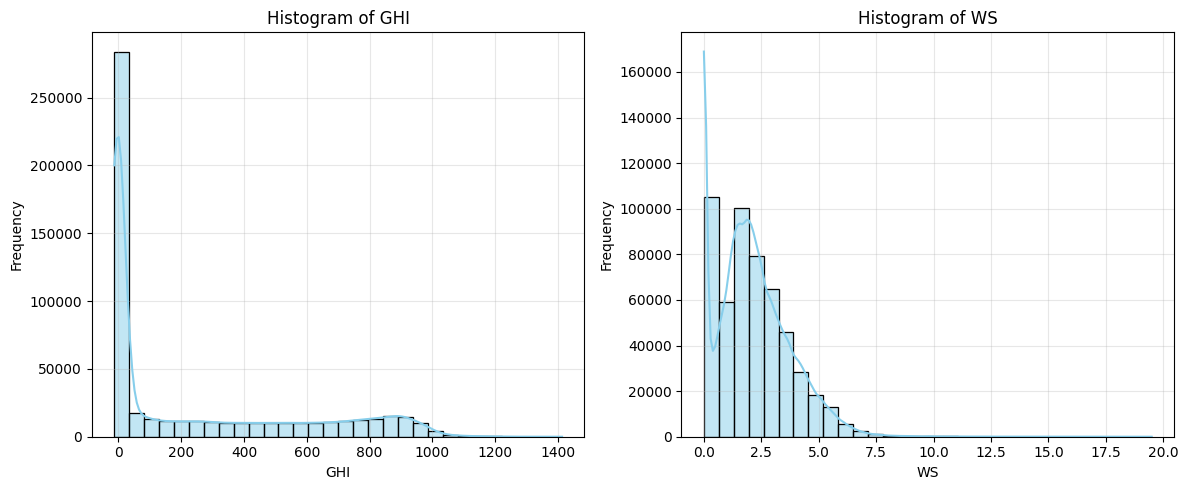

In [23]:
# Ensure no NaNs for plotting
ghi_data = df_impute['GHI'].dropna()
ws_data = df_impute['WS'].dropna()

variables = {'GHI': ghi_data, 'WS': ws_data}

plt.figure(figsize=(12,5))

for i, (var_name, data) in enumerate(variables.items(), 1):
    plt.subplot(1, 2, i)
    sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {var_name}")
    plt.xlabel(var_name)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Scatter Plots: RH vs Temperature and Solar Radiation

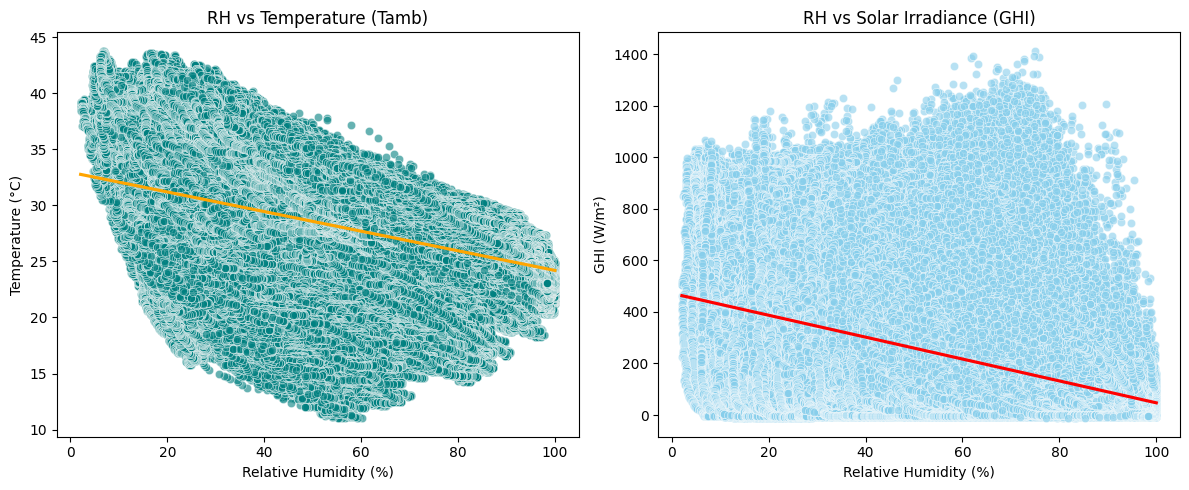

In [24]:
# Ensure no NaNs
df_temp = df_impute.dropna(subset=['RH', 'Tamb', 'GHI'])

plt.figure(figsize=(12,5))

# RH vs Temperature
plt.subplot(1,2,1)
sns.scatterplot(x='RH', y='Tamb', data=df_temp, alpha=0.6, color='teal')
sns.regplot(x='RH', y='Tamb', data=df_temp, scatter=False, color='orange')  # trend line
plt.title("RH vs Temperature (Tamb)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Temperature (°C)")

# RH vs GHI
plt.subplot(1,2,2)
sns.scatterplot(x='RH', y='GHI', data=df_temp, alpha=0.6, color='skyblue')
sns.regplot(x='RH', y='GHI', data=df_temp, scatter=False, color='red')  # trend line
plt.title("RH vs Solar Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")

plt.tight_layout()
plt.show()


### Correlation Analysis

📊 Correlation matrix (RH, Temperature, GHI):


,RH,Tamb,GHI
RH,1.000000,-0.414842,-0.360029
Tamb,-0.414842,1.000000,0.547513
GHI,-0.360029,0.547513,1.000000


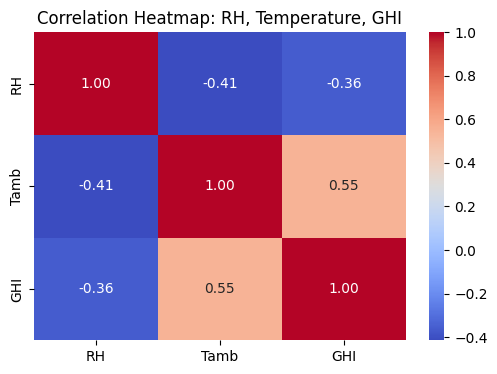

In [25]:
# Correlation between RH, Temperature, and GHI
temp_corr = df_temp[['RH','Tamb','GHI']].corr()
print("📊 Correlation matrix (RH, Temperature, GHI):")
display(temp_corr)

# Optional: Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(temp_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: RH, Temperature, GHI")
plt.show()


### Bubble Chart: GHI vs Tamb with bubble size = RH

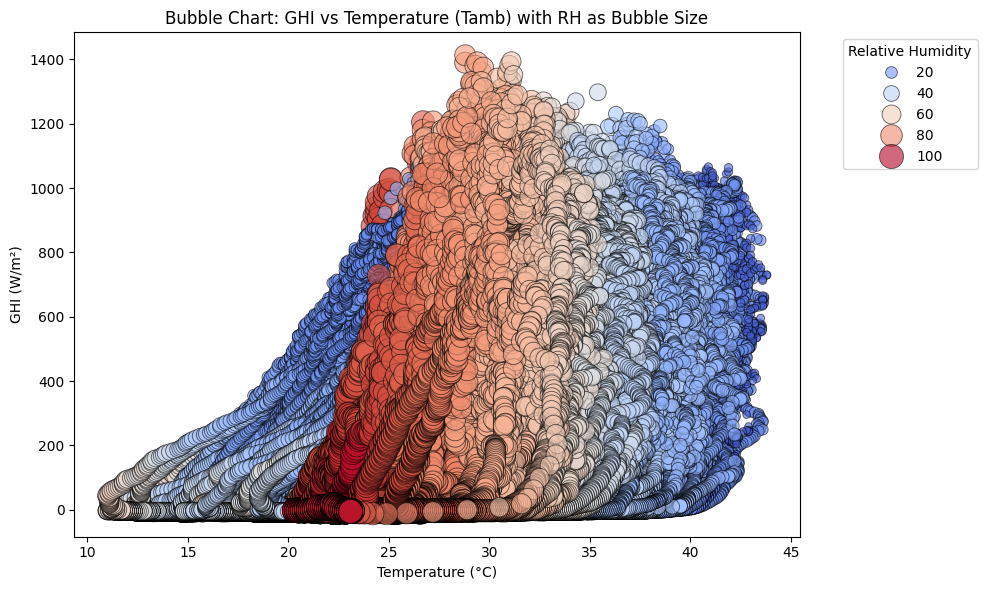

In [26]:

# Ensure no NaNs in the required columns
df_bubble = df_impute.dropna(subset=['GHI', 'Tamb', 'RH'])

plt.figure(figsize=(10,6))

# Bubble chart
sns.scatterplot(
    x='Tamb',
    y='GHI',
    size='RH',            # bubble size
    sizes=(20, 300),      # min and max bubble sizes
    hue='RH',             # optional: color by RH
    palette='coolwarm',
    data=df_bubble,
    alpha=0.6,
    edgecolor='black'
)

plt.title("Bubble Chart: GHI vs Temperature (Tamb) with RH as Bubble Size")
plt.xlabel("Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.legend(title='Relative Humidity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
